In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')
# sns.palplot(sns.color_palette("Set2", 10))
# current_palette = sns.color_palette("Set2", 10)
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.lines as lines

# from matplotlib import rcParams
# from matplotlib.font_manager import FontProperties  

# params={'font.family':'serif',
#         'font.serif':'Times New Roman',
#         'font.style':'normal',
#         'font.weight':'normal', #or 'blod'
#         }
# rcParams.update(params)
# font0=FontProperties()
# font0.set_size('large')

import matplotlib
# matplotlib.use('Agg')



In [3]:
colo = ['prevalence','collectivity','N', 'GCC','GSP',	'GIP','avd_G','avd_I','avd_S','dim_G','dim_S','dim_I',	'alpha',	'threshold_',	'mobility','sign','seed','id','scope']
df19001 = pd.read_csv('data\\result19001.csv',header=None,names = colo).astype('float64')
df19099 = pd.read_csv('data\\result19099.csv',header=None,names = colo).astype('float64')
df19c = pd.read_csv('data\\result19c.csv',header=None,names = colo).astype('float64')

# 初始种子数等于0.99
dfa9 = df19099.loc[df19099['sign']==1]
dfa9 = dfa9.groupby(by = 'id').mean()
dfa9.loc[dfa9['threshold_'] ==0.8000000000000042 ,'threshold_' ],\
dfa9.loc[dfa9['threshold_'] == 0.2999999999999983 ,'threshold_' ],\
dfa9.loc[dfa9['threshold_'] == 0.10000000000000052 ,'threshold_' ] = 0.8,0.3,0.1
dfa9.loc[dfa9['mobility'] == 0.2999999999999983,'mobility' ] = 0.3

dft9 = df19099.loc[df19099['sign']==2]
dft9 = dft9.groupby(by = 'id').mean()
dft9.loc[dft9['mobility'] == 0.2999999999999983 ,'mobility' ] = 0.3

dfv9 = df19c.loc[df19c['seed']==0.99,:]
dfv9 = dfv9.groupby(by = 'id').mean()
dfv9.loc[dfv9['threshold_'] == 0.8000000000000042 ,'threshold_' ],\
dfv9.loc[dfv9['threshold_'] == 0.2999999999999983 ,'threshold_' ],\
dfv9.loc[dfv9['threshold_'] == 0.10000000000000052 ,'threshold_' ] = 0.8,0.3,0.1

# 初始种子数等于0.01
dfa1 = df19001.loc[df19001['sign']==1,:]
dfa1 = dfa1.groupby(by = 'id').mean()
dfa1.loc[dfa1['threshold_'] == 0.8000000000000006 ,'threshold_' ],\
dfa1.loc[dfa1['threshold_'] == 0.29999999999999893 ,'threshold_' ],\
dfa1.loc[dfa1['threshold_'] == 0.10000000000000007 ,'threshold_' ] = 0.8,0.3,0.1
dfa1.loc[dfa1['mobility'] == 0.29999999999999893 ,'mobility' ] = 0.3

dft1 = df19001.loc[df19001['sign']==2,:]
dft1 = dft1.groupby(by = 'id').mean()
dft1.loc[dft1['mobility'] == 0.29999999999999893 ,'mobility' ] = 0.3

dfv1 = df19c.loc[df19c['seed']==0.01,:]
dfv1 = dfv1.groupby(by = 'id').mean()
dfv1.loc[dfv1['threshold_'] == 0.8000000000000042 ,'threshold_' ],\
dfv1.loc[dfv1['threshold_'] == 0.2999999999999983 ,'threshold_' ],\
dfv1.loc[dfv1['threshold_'] == 0.10000000000000052 ,'threshold_' ] = 0.8,0.3,0.1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\科研任务\\new-contact_model\\文章定稿\\Latex\\002.eps'

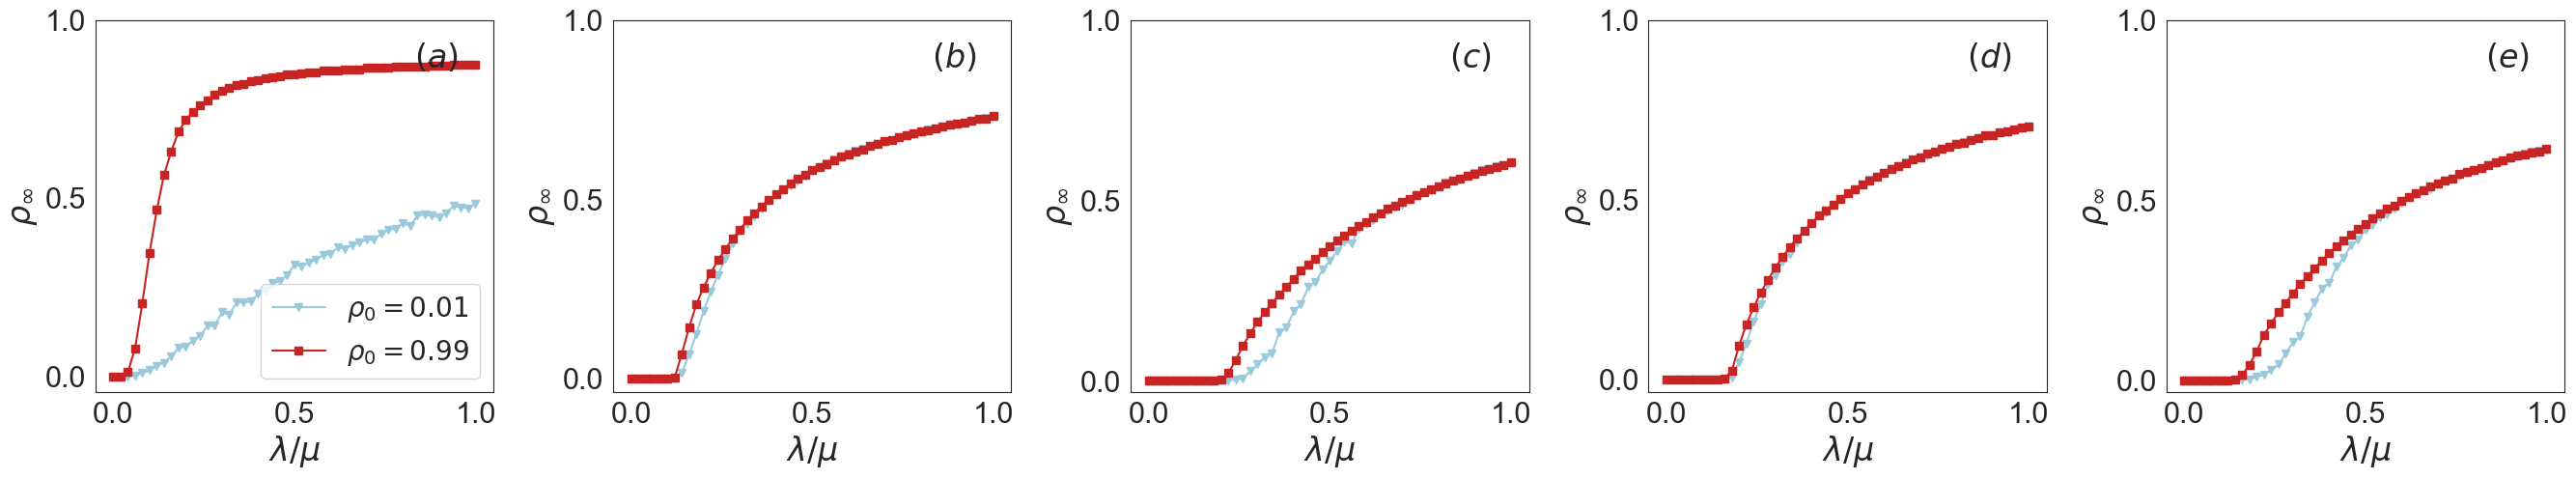

In [4]:
params={'font.family':'sans-serif',
        'font.serif':'Microsoft Sans Serif',
        'font.style':'normal',
        'font.weight':'normal', #or 'blod'
        }
# rcParams.update(params)

para = [[2,0.3],[2,1.5],[-2,0.3],[-2,1.5],[0,0.3]]
tempdf01,tempdf09= dft1,dft9
para1,para2,var1,var2 ='alpha', 'mobility','threshold_','prevalence'
names = locals()
count = 1
for i,j in para:
        names['s1data' + str(count) ] = tempdf01.loc[(tempdf01[para1] == i)&(tempdf01[para2] == j),:]
        names['s9data' + str(count) ] = tempdf09.loc[(tempdf09[para1] == i)&(tempdf09[para2] == j),:]
        count += 1

fig,axes = plt.subplots(1,5,figsize = (33,5),dpi = 100,sharey = False)
plt.subplots_adjust(wspace=0.3)
for ax,data01,data09 in zip(axes.ravel(),[names.get('s1data' + str(i) ) for i in range(1,6)],\
    [names.get('s9data' + str(i) ) for i in range(1,6)]):
        # ax.plot(data01[var1],data01[var2],'v-',c = '#2878b5',label = '$\\rho_0$ = 0.01')
        # ax.plot(data09[var1],data09[var2],'s-',c = '#f8ac8c',label = '$\\rho_0$ = 0.99')
        ax.plot(data01[var1],data01[var2],'v-',c = '#9ac9db',markersize = 6,label = '$\\rho_0 = 0.01$')
        ax.plot(data09[var1],data09[var2],'s-',c = '#c82423',markersize = 6,label = '$\\rho_0 = 0.99$')

# 绘制标准曲线
# axes[4].plot(data09[var1],data09[var2]*(np.pi/(30^2)),'-',linewidth = 4,c = 'k')

axes[0].legend(loc = 4,fontsize = 20)
for ax,title in zip(axes.ravel(),[f'$({i})$' for i in 'abcde']):
    ax.set_xlabel('$\lambda/\mu$',fontsize = 24)
    ax.set_ylabel('$\\rho_\infty$',fontsize = 24,)
    ax.set_yticks([0.0,0.5,1.0],[0.0,0.5,1.0])
    ax.set_xticks([0.0,0.5,1.0])
    ax.tick_params( labelsize=22 )
    ax.set_title(title,loc = 'left',x = 0.8,y =0.85,fontsize = 24)

# plt.savefig('D:\\科研任务\\new-contact_model\\文章定稿\\Latex\\002.eps',format='eps',bbox_inches = 'tight')
# plt.savefig('D:\\科研任务\\new-contact_model\\文章定稿\\图片\\002.jpg',dpi = 300,bbox_inches = 'tight')

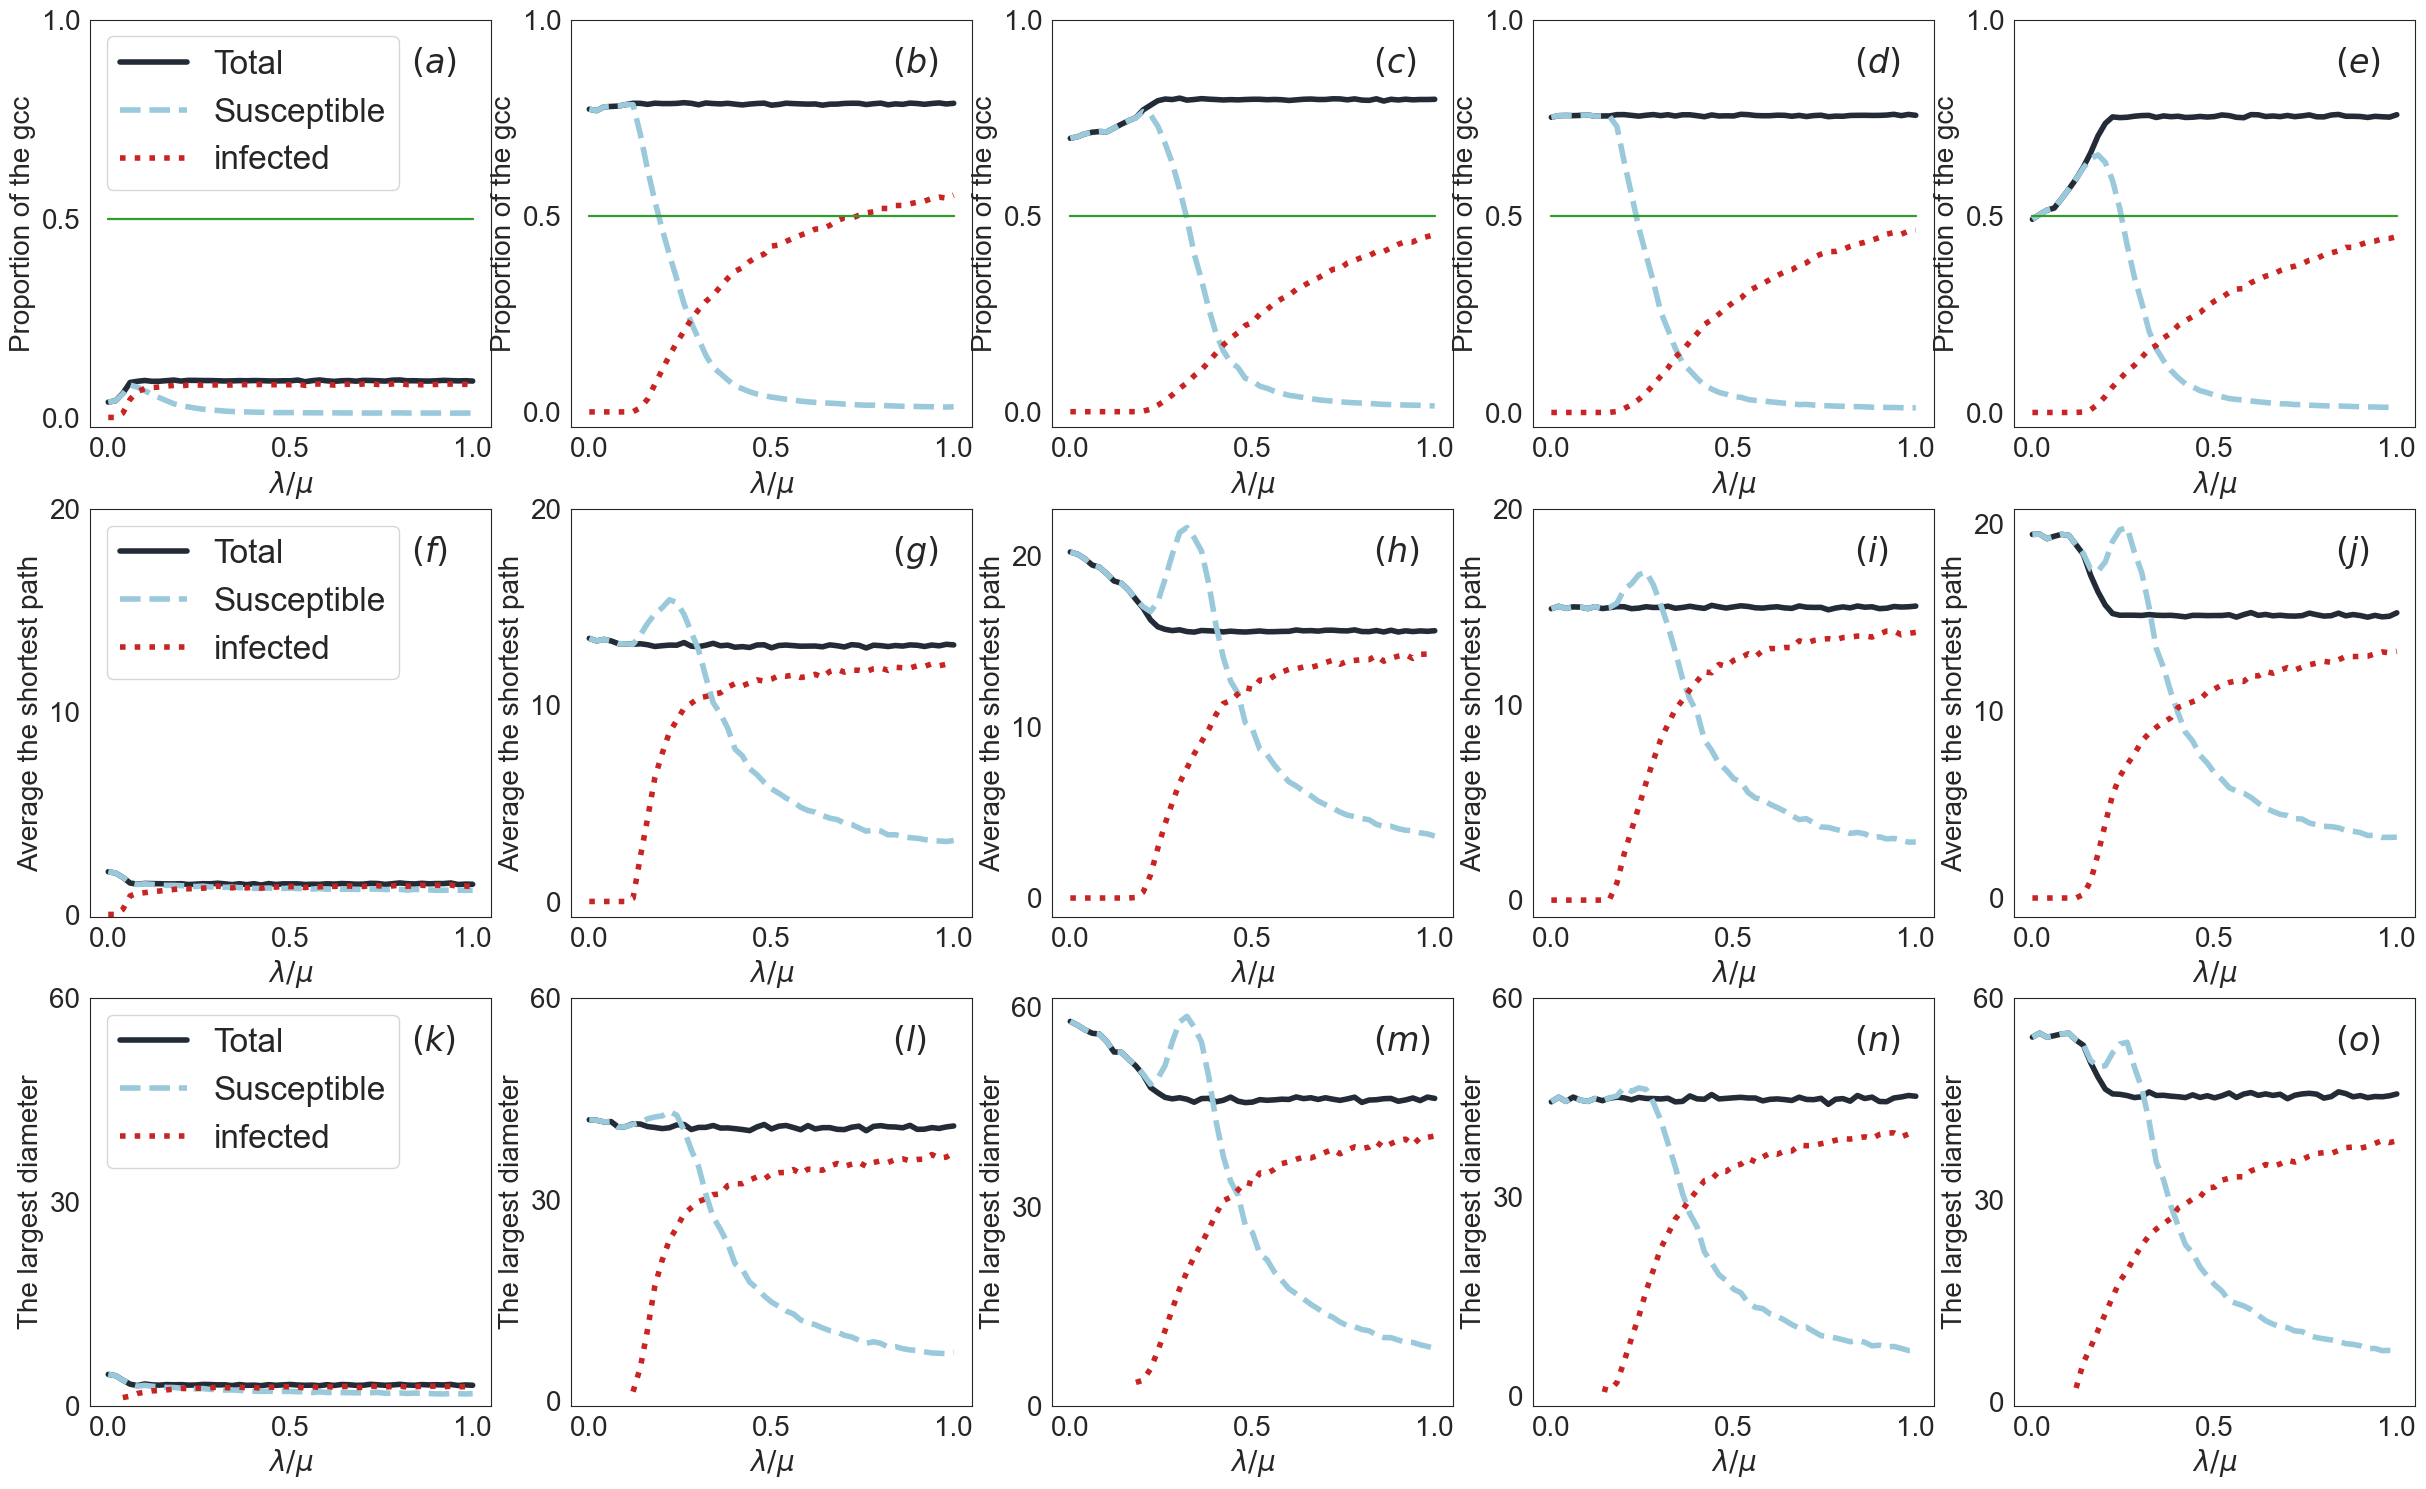

In [ ]:
para = [[2,0.3],[2,1.5],[-2,0.3],[-2,1.5],[0,0.3]]
tempdf01,tempdf09= dft1,dft9
para1,para2,var1,var2,var3,var4,var5,var6,var7 ,var8,var9,var10= 'alpha', 'mobility','threshold_','GCC','GSP','GIP','avd_G','avd_S','avd_I','dim_G','dim_S','dim_I'
names = locals()
count = 1
for i,j in para:
        names['s1data' + str(count) ] = tempdf01.loc[(tempdf01[para1] == i)&(tempdf01[para2] == j),:]
        names['s9data' + str(count) ] = tempdf09.loc[(tempdf09[para1] == i)&(tempdf09[para2] == j),:]
        count += 1
# 绘制画板
fig,axes = plt.subplots(3,5,figsize = (30,18),dpi = 100,sharey = False)
colormap = ['#232b36','#9ac9db','#c82423']
linestyle = ['-','--',':']
width = 4
# colormap = ['#232b36','#9c3129','#b4bfd0']
labelmap = ['Total','Susceptible','infected']
for ax,data01,data09 in zip([axes[0,i] for i in range(5)],[names.get('s1data' + str(i) ) for i in range(1,6)],\
    [names.get('s9data' + str(i) ) for i in range(1,6)]):
    for var,c,label,line in zip([var2,var3,var4],colormap,labelmap,linestyle):
        # ax.plot(data01[var1],data01[var],'v-',c = '#2878b5',label = '$\\rho = 0.01$')
        # ax.plot(data09[var1],data09[var],'s-',c = '#f8ac8c',label = '$\\rho = 0.99$')
        ax.plot(data09[var1],data09[var]/1000,line,c = c,label = f'{label}',linewidth = width)
        # ax.plot(data01[var1],data01[var]/1000,'-',c = c,label = f'{label}')
        # ax.plot(data09[var1],data09[var]/1000,'s-',c = c,label = f'{var}-0.99')
        # ax.plot([0,1],[0.5,0.5])
        ax.set_yticks([0.0,0.5,1.0])
        ax.set_xticks([0.0,0.5,1.0])
        ax.set_ylabel('Proportion of the gcc',fontsize = 20)
        


for ax,data01,data09 in zip([axes[1,i] for i in range(5)],[names.get('s1data' + str(i) ) for i in range(1,6)],\
    [names.get('s9data' + str(i) ) for i in range(1,6)]):
    for var,c,label,line in zip([var5,var6,var7],colormap,labelmap,linestyle):
        # ax.plot(data01[var1],data01[var],'v-',c = '#2878b5',label = '$\\rho = 0.01$')
        # ax.plot(data09[var1],data09[var],'s-',c = '#f8ac8c',label = '$\\rho = 0.99$')
        # ax.plot(data01[var1],data01[var],'-',c = c,label = f'{label}')
        ax.plot(data09[var1],data09[var],line,c = c,label = f'{label}',linewidth = width)
        # ax.plot(data09[var1],data09[var],'s-',c = c,label = f'{var}-0.99')
        ax.set_yticks([0,10,20])
        ax.set_xticks([0.0,0.5,1.0])
        ax.set_ylabel('Average the shortest path',fontsize = 20)


for ax,data01,data09 in zip([axes[2,i] for i in range(5)],[names.get('s1data' + str(i) ) for i in range(1,6)],\
    [names.get('s9data' + str(i) ) for i in range(1,6)]):
    for var,c,label,line in zip([var8,var9,var10],colormap,labelmap,linestyle):
        # ax.plot(data01[var1],data01[var],'v-',c = '#2878b5',label = '$\\rho = 0.01$')
        # ax.plot(data09[var1],data09[var],'s-',c = '#f8ac8c',label = '$\\rho = 0.99$')
        # ax.plot(data01[var1],data01[var],'-',c = c,label = f'{label}')
        ax.plot(data09[var1],data09[var],line,c = c,label = f'{label}',linewidth = width)
        # ax.plot(data09[var1],data09[var],'s-',c = c,label = f'{var}-0.99')
        ax.set_yticks([0,30,60])
        ax.set_xticks([0.0,0.5,1.0])
        ax.set_ylabel('The largest diameter',fontsize = 20)

axes[0,0].legend(loc = 2,fontsize = 24)
axes[1,0].legend(loc = 2,fontsize = 24)
axes[2,0].legend(loc = 2,fontsize = 24)

for ax,title in zip(axes.ravel(),[f'$({i})$' for i in 'abcdefghijklmno']):
    ax.set_xlabel('$\lambda/\mu$',fontsize = 20)
    ax.tick_params( labelsize=20 )
    ax.set_title(title,loc = 'left',y = 0.85,x = 0.8,fontsize = 24)
# plt.savefig('D:\\科研任务\\new-contact_model\\文章定稿\\Latex\\004.eps',dpi = 200,format='eps')
# plt.savefig('D:\\科研任务\\new-contact_model\\文章定稿\\图片\\004.jpg',dpi = 300)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


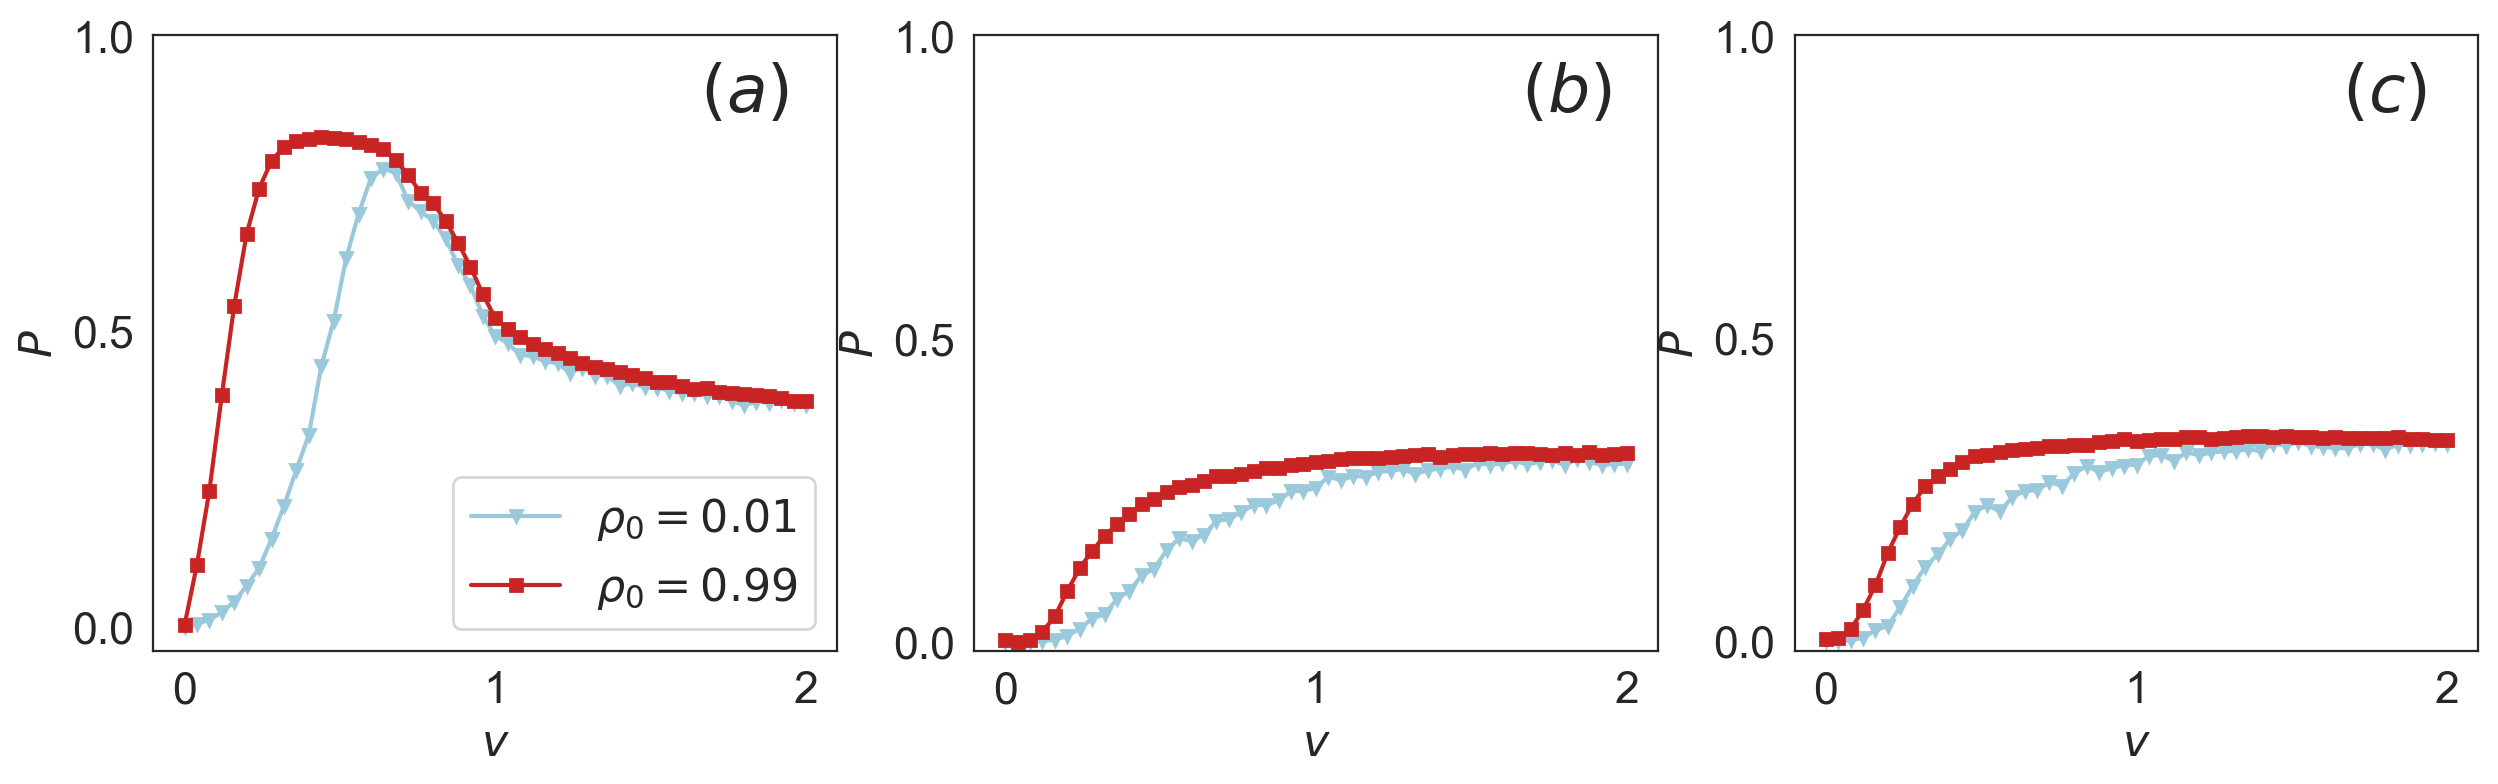

In [7]:
# para = [[2,0.3],[2,1.5],[-2,0.3],[-2,1.5],[0,0.3]]
para = [[2,0.3],[-2,0.3],[0,0.3]]

tempdf01,tempdf09= dfv1,dfv9
para1,para2,var1,var2 ='alpha','threshold_','mobility','prevalence'
names = locals()
count = 1
for i,j in para:
        names['s1data' + str(count) ] = tempdf01.loc[(tempdf01[para1] == i)&(tempdf01[para2] == j),:]
        names['s9data' + str(count) ] = tempdf09.loc[(tempdf09[para1] == i)&(tempdf09[para2] == j),:]
        count += 1
colormap = ['#232b36','#9ac9db','#c82423']

fig,axes = plt.subplots(1,3,figsize = (15,4),dpi = 200,sharey = False)
for ax,data01,data09 in zip(axes.ravel(),[names.get('s1data' + str(i) ) for i in range(1,4)],\
    [names.get('s9data' + str(i) ) for i in range(1,4)]):
        ax.plot(data01[var1],data01[var2],'v-',c = '#9ac9db',markersize = 4,label = '$\\rho_0 = 0.01$')
        ax.plot(data09[var1],data09[var2],'s-',c = '#c82423',markersize = 4,label = '$\\rho_0 = 0.99$')
axes[0].legend(loc = 4,fontsize = 16)

for ax,title in zip(axes.ravel(),[f'$({i})$' for i in 'abc']):
    ax.set_xlabel('$v$',fontsize = 16)
    ax.set_ylabel('$P$',fontsize = 16)
    ax.set_title(title,loc = 'left',y =0.85,x = 0.8,fontsize = 24)
    ax.set_yticks([0.0,0.5,1.0])
    ax.set_xticks([0.0,1.0,2.0])
    ax.tick_params( labelsize=16)
    

plt.savefig('D:\\科研任务\\new-contact_model\\文章定稿\\gwb-demo\\005.eps',dpi = 300,format='eps',bbox_inches = 'tight')
plt.savefig('D:\\科研任务\\new-contact_model\\文章定稿\\gwb-demo-red\\005.eps',dpi = 300,format='eps',bbox_inches = 'tight')

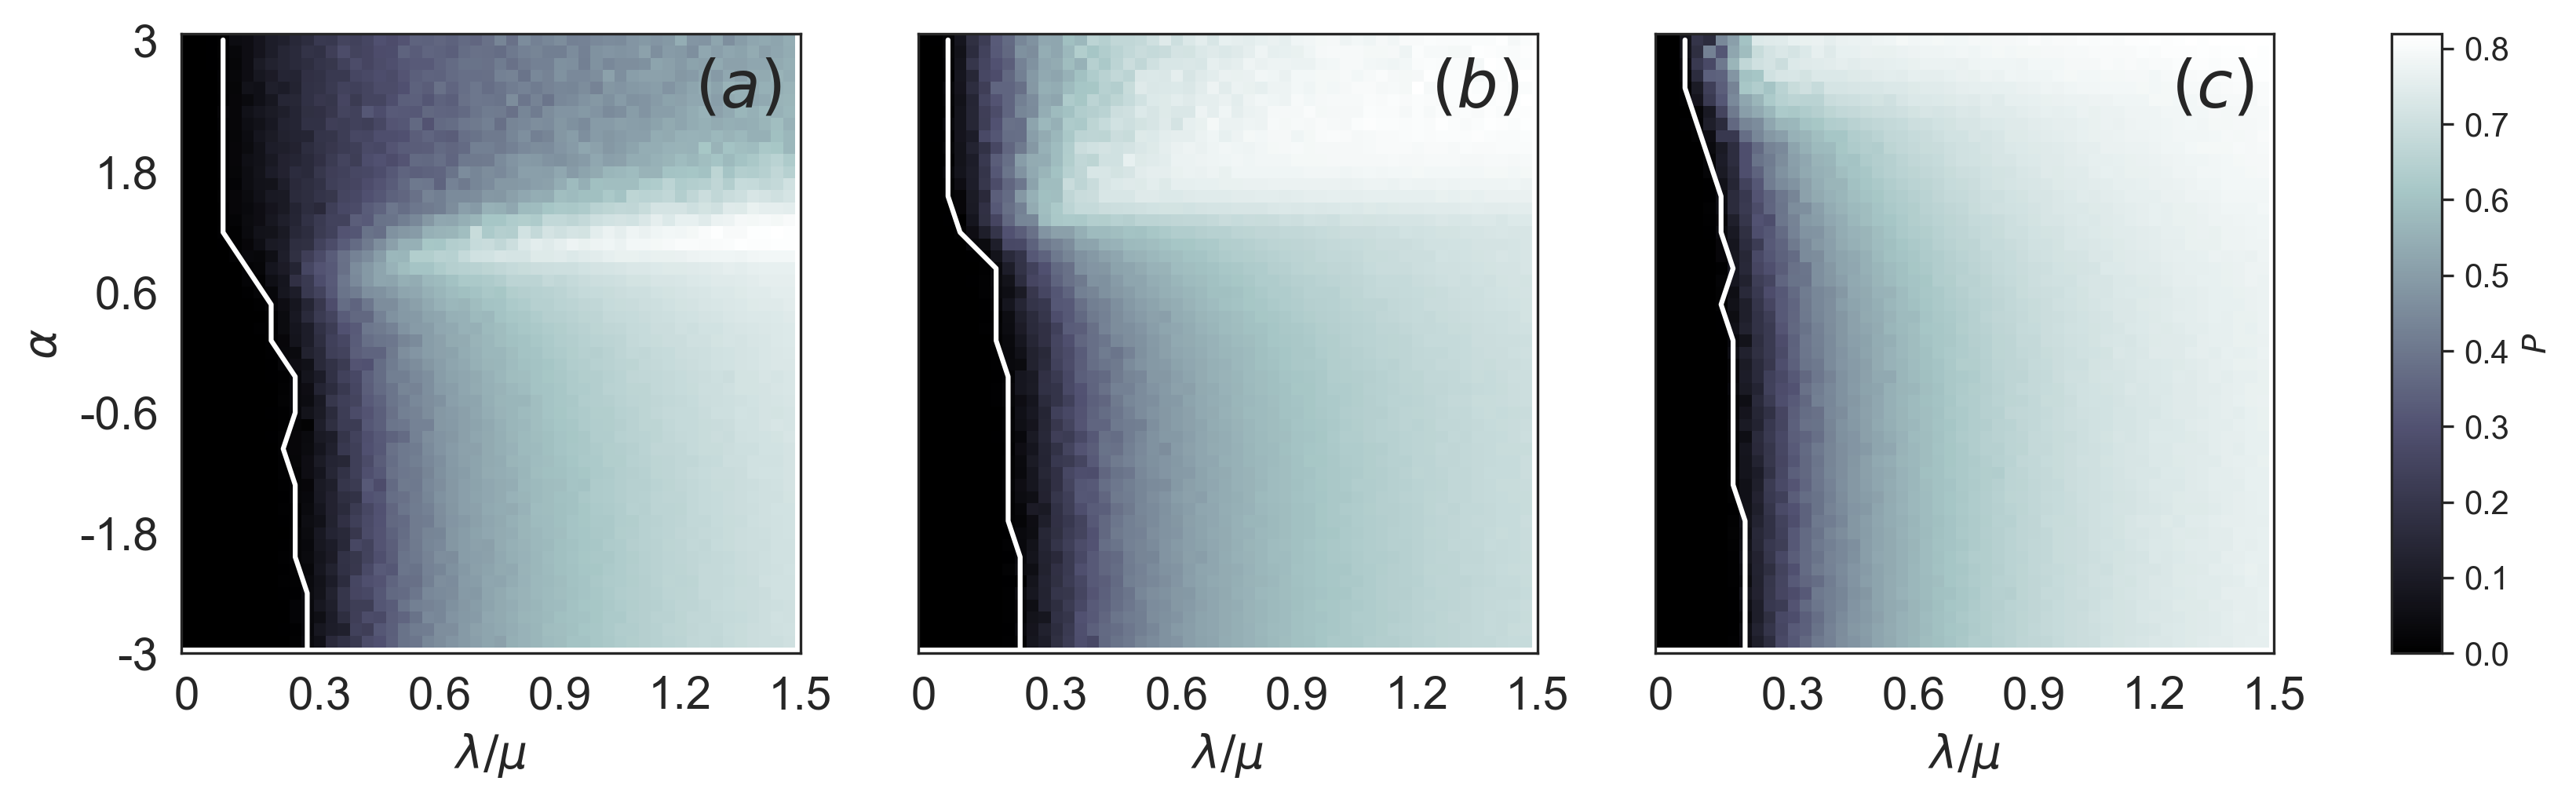

In [9]:
# 读取数据
colo = ['prevalence','collectivity','N', 'GCC','GSP',	'GIP','avd_G','avd_S','avd_I','dim_G','dim_S','dim_I',	'alpha',	'threshold_',	'mobility','sign','seed','id','scope']
df01 = pd.read_csv("data\\result21s001 (3).csv",header=None,names = colo)

df01a = df01.loc[(df01['sign']==1),]
df01a = df01a.groupby(by = 'id').mean()
df01a.loc[df01a['mobility'] == 0.30000000000000027 ,'mobility' ] = 0.3

# 阈值线函数
def gen_min(data,threshold):
    min_data = []
    count = 0
    for i in data.index:
        min = data.loc[i,data.loc[i,]>threshold].min()
        x  = data.loc[i,].to_list().index(min)
        min_data.append([x,count,min])
        count += 1
    # min_data.append([,51,min])
    min_data = pd.DataFrame(min_data,columns=list('abc'))
    temp =min_data[(min_data.index %3 ==1)].append(min_data.iloc[[0,-1],:])
    temp.iloc[-1,1]+=1
    temp = temp.sort_index()
    return temp

# 坐标轴与位置
position = [ 0, 11, 21 ,31 ,41 ,51]
t_ticks = [0,  0.3 ,0.6, 0.9, 1.2, 1.5]
a_ticks = [-3,  -1.8 ,-0.6 , 0.6 , 1.8,  3 ]
temp_tick1 ,temp_tick2 = a_ticks[::-1],t_ticks

# 生成待分析数据
# temp1 = df99a.loc[(df99a['mobility']==0.5),].pivot('alpha','threshold_','prevalence').sort_values(by = ['alpha'],ascending=False)
data1 =df01a.loc[(df01a['mobility']==0.3),].pivot('alpha','threshold_','prevalence').sort_values(by = ['alpha'],ascending=False)
data2 =df01a.loc[(df01a['mobility']==0.5),].pivot('alpha','threshold_','prevalence').sort_values(by = ['alpha'],ascending=False)
# data3 =df01a.loc[(df01a['mobility']==1.0),].pivot('alpha','threshold_','prevalence').sort_values(by = ['alpha'],ascending=False)
data3 = pd.read_csv('data3.csv',header=0,index_col=0)


fig = plt.figure(figsize=(12,4),dpi = 300)
# fig,axes = plt.subplots(figsize = (26,8),dpi= 100,sharex = False)
grids = ImageGrid(fig, rect=(0.1,0.15,0.8,0.8),nrows_ncols=(1, 3),\
    axes_pad=0.5, label_mode="L", cbar_location="right", cbar_mode="single",cbar_size="8%")
for grid, data,title in zip(grids,[data1, data2,data3],[f'$({i})$' for i in "abc"]):
    # cmap =  LinearSegmentedColormap('BlueRed1', cdict1)
    im = grid.imshow(data,cmap ='bone' )
    min_data = gen_min(data,threshold=0.01)
    # min_data =min_data[min_data.index %3 ==1]
    grid.add_artist(lines.Line2D(min_data['a'], min_data['b'],c ='w'))

    grids.cbar_axes[0].colorbar(im)
    grid.grid(visible=False)
    grid.get_xaxis().set_ticks(position,temp_tick2)
    grid.get_yaxis().set_ticks(position,temp_tick1)
    # grid.set_xticks(position,temp_tick1)
    grid.tick_params( labelsize=14 )
    grid.set_ylabel(f'$\\alpha$',fontsize = 14)
    grid.set_xlabel(f'$\lambda/\mu$',fontsize = 14)
    grid.set_title(title,y =0.85,x = 0.9,fontsize = 20)
    
    
cax = grids.cbar_axes[0]
axis = cax.axis[cax.orientation]
axis.label.set_text("$P$")


plt.savefig('D:\\科研任务\\new-contact_model\\文章定稿\\gwb-demo\\006.eps',dpi = 300,format='eps',bbox_inches = 'tight')
plt.savefig('D:\\科研任务\\new-contact_model\\文章定稿\\gwb-demo-red\\006.eps',dpi = 300,format='eps',bbox_inches = 'tight')
plt.show()

In [ ]:
# 读取数据
colo = ['prevalence','collectivity','N', 'GCC','GSP',	'GIP','avd_G','avd_S','avd_I','dim_G','dim_S','dim_I',	'alpha',	'threshold_',	'mobility','sign','seed','id','scope']
df01 = pd.read_csv("data\\result21s001 (3).csv",header=None,names = colo)

df01a = df01.loc[(df01['sign']==1),]
df01a = df01a.groupby(by = 'id').mean()
df01a.loc[df01a['mobility'] == 0.30000000000000027 ,'mobility' ] = 0.3

# 阈值线函数
def gen_min(data,threshold):
    min_data = []
    count = 0
    for i in data.index:
        min = data.loc[i,data.loc[i,]>threshold].min()
        x  = data.loc[i,].to_list().index(min)
        min_data.append([x,count,min])
        count += 1
    # min_data.append([,51,min])
    min_data = pd.DataFrame(min_data,columns=list('abc'))
    temp =min_data[(min_data.index %3 ==1)].append(min_data.iloc[[0,-1],:])
    temp.iloc[-1,1]+=1
    temp = temp.sort_index()
    return temp

# 坐标轴与位置
position = [ 0, 11, 21 ,31 ,41 ,51]
t_ticks = [0,  0.3 ,0.6, 0.9, 1.2, 1.5]
a_ticks = [-3,  -1.8 ,-0.6 , 0.6 , 1.8,  3 ]
temp_tick1 ,temp_tick2 = a_ticks[::-1],t_ticks

# 生成待分析数据
# temp1 = df99a.loc[(df99a['mobility']==0.5),].pivot('alpha','threshold_','prevalence').sort_values(by = ['alpha'],ascending=False)
data1 =df01a.loc[(df01a['mobility']==0.3),].pivot('alpha','threshold_','prevalence').sort_values(by = ['alpha'],ascending=False)
data2 =df01a.loc[(df01a['mobility']==0.5),].pivot('alpha','threshold_','prevalence').sort_values(by = ['alpha'],ascending=False)
# data3 =df01a.loc[(df01a['mobility']==1.0),].pivot('alpha','threshold_','prevalence').sort_values(by = ['alpha'],ascending=False)
data3 = pd.read_csv('data3.csv',header=0,index_col=0)


fig = plt.figure(figsize=(12,4),dpi = 300)
# fig,axes = plt.subplots(figsize = (26,8),dpi= 100,sharex = False)
grids = ImageGrid(fig, rect=(0.1,0.15,0.8,0.8),nrows_ncols=(1, 3),\
    axes_pad=0.5, label_mode="L", cbar_location="right", cbar_mode="single",cbar_size="8%")
for grid, data,title in zip(grids,[data1, data2,data3],[f'$({i})$' for i in "abc"]):
    # cmap =  LinearSegmentedColormap('BlueRed1', cdict1)
    im = grid.imshow(data,cmap ='bone' )
    min_data = gen_min(data,threshold=0.01)
    # min_data =min_data[min_data.index %3 ==1]
    grid.add_artist(lines.Line2D(min_data['a'], min_data['b'],c ='w'))

    grids.cbar_axes[0].colorbar(im)
    grid.grid(visible=False)
    grid.get_xaxis().set_ticks(position,temp_tick2)
    grid.get_yaxis().set_ticks(position,temp_tick1)
    # grid.set_xticks(position,temp_tick1)
    grid.tick_params( labelsize=14 )
    grid.set_ylabel(f'$\\alpha$',fontsize = 14)
    grid.set_xlabel(f'$\lambda/\mu$',fontsize = 14)
    grid.set_title(title,y =0.85,x = 0.9,fontsize = 20)
    
    
cax = grids.cbar_axes[0]
axis = cax.axis[cax.orientation]
axis.label.set_text("$P$")


plt.savefig('D:\\科研任务\\new-contact_model\\文章定稿\\gwb-demo\\006.eps',dpi = 300,format='eps',bbox_inches = 'tight')
plt.savefig('D:\\科研任务\\new-contact_model\\文章定稿\\gwb-demo-red\\006.eps',dpi = 300,format='eps',bbox_inches = 'tight')
plt.show()

0.3    2601
0.5    2601
1.0    2601
1.5    2601
Name: mobility, dtype: int64